# BitMEX Users Analysis
Author : Arnaud Carrere

### Imports

In [1]:
import pandas as pd
import datetime
from datetime import timedelta

### Load data

In [2]:
data = pd.read_csv("../Dumps/BitMEX_chat.csv")
data.head()

,channelID,date,fromBot,id,message,user
0,4.0,2018-12-18 10:10:37.251000+00:00,False,24700959,kbmson1: ㄴㄴㄴㄴㄴㄴ 지금은 모름 어디로 갈지,Hogu In Korea
1,4.0,2018-12-18 10:10:35.537000+00:00,False,24700958,Daechool-Wang: 잘하면 몇달후에도 비웃음당할수도,Hehe_haha
2,1.0,2018-12-18 10:10:34.092000+00:00,False,24700957,A1a1a1: It just so happens more people are sel...,ReniX
3,4.0,2018-12-18 10:10:32.322000+00:00,False,24700956,깔깔깔,mark famous
4,1.0,2018-12-18 10:10:31.785000+00:00,False,24700955,"yo24461: because no one quit vrypto dude, so b...",ariady


In [3]:
channels = pd.read_json("../Dumps/BitMEX_channels.json")
channels = pd.Series(channels.name.values,index=channels.id).to_dict()
channels

{1: 'English',
 2: '中文',
 3: 'Русский',
 4: '한국어',
 5: '日本語',
 6: 'Español',
 7: 'Français'}

In [4]:
#Channels dictionary in English
channels[2] = "Chinese"
channels[3] = "Russian"
channels[4] = "Korean"
channels[5] = "Japanese"
channels[6] = "Spanish"
channels[7] = "French"
channels

{1: 'English',
 2: 'Chinese',
 3: 'Russian',
 4: 'Korean',
 5: 'Japanese',
 6: 'Spanish',
 7: 'French'}

### Data engineering

In [5]:
#Useless columns and NaN
columns_to_drop = ["fromBot","id","message","user"]
data.drop(columns_to_drop, axis=1, inplace=True)
data.fillna("", inplace=True)

#Date features
data["date"] = data.apply(lambda row: datetime.datetime.strptime(row["date"][:19],"%Y-%m-%d %H:%M:%S"), axis=1)
data["date_cal"] = data.apply(lambda row: row["date"].date(), axis=1)
data["hour_UTC"] = data.apply(lambda row: row["date"].hour, axis=1)

#Channel feature
data["channel"] = data.apply(lambda row: channels[row["channelID"]], axis=1)

### Internal statistics

In [6]:
start = data.iloc[-1]["date"]
end = data.iloc[0]["date"]

print("Conversation started: {}".format(str(start)))
print("Conversation ended: {}".format(str(end)))

Conversation started: 2018-11-10 12:16:39
Conversation ended: 2018-12-18 10:10:37


In [7]:
#Reduction to one month
data = data[(data["date_cal"] <= datetime.date(2018,12,17)) & (data["date_cal"] >= datetime.date(2018,11,18))]
data.head()

,channelID,date,date_cal,hour_UTC,channel
19976,4.0,2018-12-17 23:59:59,2018-12-17,23,Korean
19977,4.0,2018-12-17 23:59:57,2018-12-17,23,Korean
19978,4.0,2018-12-17 23:59:55,2018-12-17,23,Korean
19979,4.0,2018-12-17 23:59:53,2018-12-17,23,Korean
19980,1.0,2018-12-17 23:59:51,2018-12-17,23,English


In [8]:
print("Mean from 11-18-2018 to 12-17-2018")
table = (pd.crosstab(data.channel, data.hour_UTC, normalize=True)*100).round(4)
table

Mean from 11-18-2018 to 12-17-2018


hour_UTC,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
channel,,,,,,,,,,,,,,,,,,,,,
Chinese,0.2079,0.2372,0.3194,0.3404,0.3336,0.3665,0.3471,0.3181,0.3849,0.3707,...,0.4317,0.4416,0.4768,0.3837,0.2687,0.3131,0.2399,0.2163,0.1799,0.1840
English,1.6811,1.5328,1.4950,1.3433,1.3739,1.4270,1.3354,1.2762,1.3122,1.3607,...,1.6022,1.6375,1.9591,1.8379,1.5784,2.0333,1.9449,2.1482,1.9646,1.7948
French,0.0001,0.0001,0.0002,0.0001,0.0001,0.0001,0.0002,0.0003,0.0003,0.0000,...,0.0005,0.0003,0.0008,0.0003,0.0000,0.0003,0.0001,0.0002,0.0003,0.0001
Japanese,0.0125,0.0188,0.0232,0.0150,0.0116,0.0181,0.0153,0.0185,0.0211,0.0245,...,0.0547,0.0421,0.0271,0.0098,0.0026,0.0036,0.0061,0.0059,0.0089,0.0083
Korean,1.8099,1.9015,1.9728,2.1487,2.2476,2.2826,2.3227,2.1400,2.3187,2.3089,...,2.3812,2.3210,2.3793,2.0025,1.5448,1.5830,1.4039,1.4406,1.3931,1.5070
Russian,0.1732,0.1859,0.1301,0.0756,0.0950,0.0883,0.1147,0.1132,0.1656,0.1446,...,0.1914,0.1791,0.2298,0.2391,0.2216,0.2642,0.2170,0.2296,0.2311,0.1941
Spanish,0.0001,0.0011,0.0006,0.0003,0.0002,0.0006,0.0006,0.0006,0.0001,0.0002,...,0.0001,0.0002,0.0002,0.0003,0.0006,0.0006,0.0001,0.0005,0.0003,0.0002


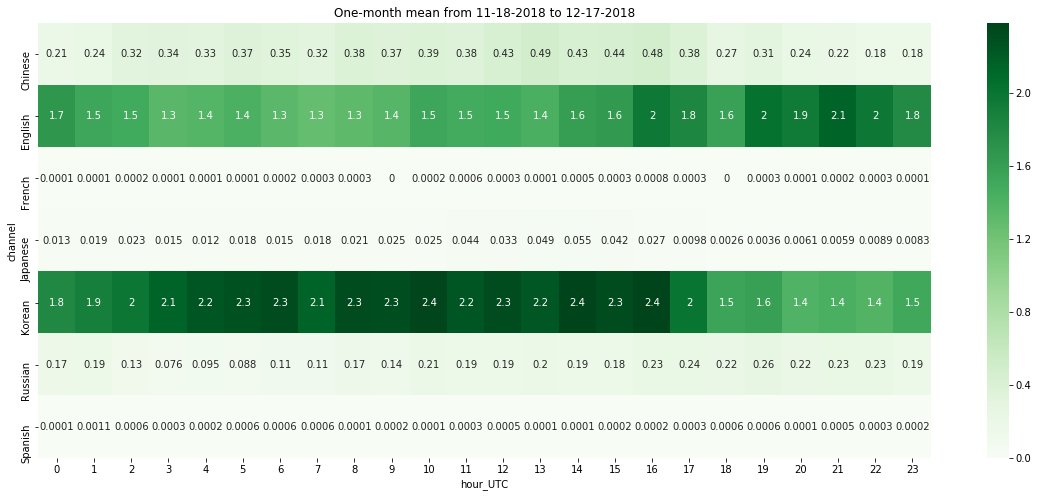

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
ax = plt.axes()
heatmap = sns.heatmap(table, cmap="Greens", ax = ax, annot=True)
ax.set_title('One-month mean from 11-18-2018 to 12-17-2018')
plt.show()

In [93]:
figure = heatmap.get_figure()    
figure.savefig('heatmap.png')